In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [50]:
live = pd.read_csv("C:/Users/User/Downloads/termdeposit_test.csv")

In [51]:
live

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [52]:
live=live.drop(['ID','job','contact','month','default','education','day'], axis=1)
live


,age,marital,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,32,married,118,yes,no,20,6,-1,0,unknown
1,78,divorced,2787,no,no,372,1,-1,0,unknown
2,31,single,144,yes,no,676,1,-1,0,unknown
3,57,single,3777,yes,no,65,2,-1,0,unknown
4,45,divorced,-705,no,yes,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...
13559,39,married,45,no,no,148,4,-1,0,unknown
13560,54,married,2281,yes,no,158,1,-1,0,unknown
13561,35,married,285,yes,no,136,1,-1,0,unknown
13562,29,single,464,no,no,208,2,91,3,success


In [53]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       13564 non-null  int64 
 1   marital   13564 non-null  object
 2   balance   13564 non-null  int64 
 3   housing   13564 non-null  object
 4   loan      13564 non-null  object
 5   duration  13564 non-null  int64 
 6   campaign  13564 non-null  int64 
 7   pdays     13564 non-null  int64 
 8   previous  13564 non-null  int64 
 9   poutcome  13564 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.0+ MB


In [54]:
live.isnull().sum()

age         0
marital     0
balance     0
housing     0
loan        0
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
dtype: int64

In [55]:
live.poutcome.value_counts()

poutcome
unknown    11030
failure     1539
other        552
success      443
Name: count, dtype: int64

In [56]:
live['marital'] = live['marital'].replace({'single': 1, 'married': 2,'divorced':3})
live['housing'] = live['housing'].replace({'yes': 1, 'no': 0})
live['poutcome'] = live['poutcome'].replace({'success': 1, 'failure': 0, 'unknown':2,'other':3})
live['loan'] = live['loan'].replace({'yes': 1, 'no': 0})
live

,age,marital,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,32,2,118,1,0,20,6,-1,0,2
1,78,3,2787,0,0,372,1,-1,0,2
2,31,1,144,1,0,676,1,-1,0,2
3,57,1,3777,1,0,65,2,-1,0,2
4,45,3,-705,0,1,111,1,-1,0,2
...,...,...,...,...,...,...,...,...,...,...
13559,39,2,45,0,0,148,4,-1,0,2
13560,54,2,2281,1,0,158,1,-1,0,2
13561,35,2,285,1,0,136,1,-1,0,2
13562,29,1,464,0,0,208,2,91,3,1


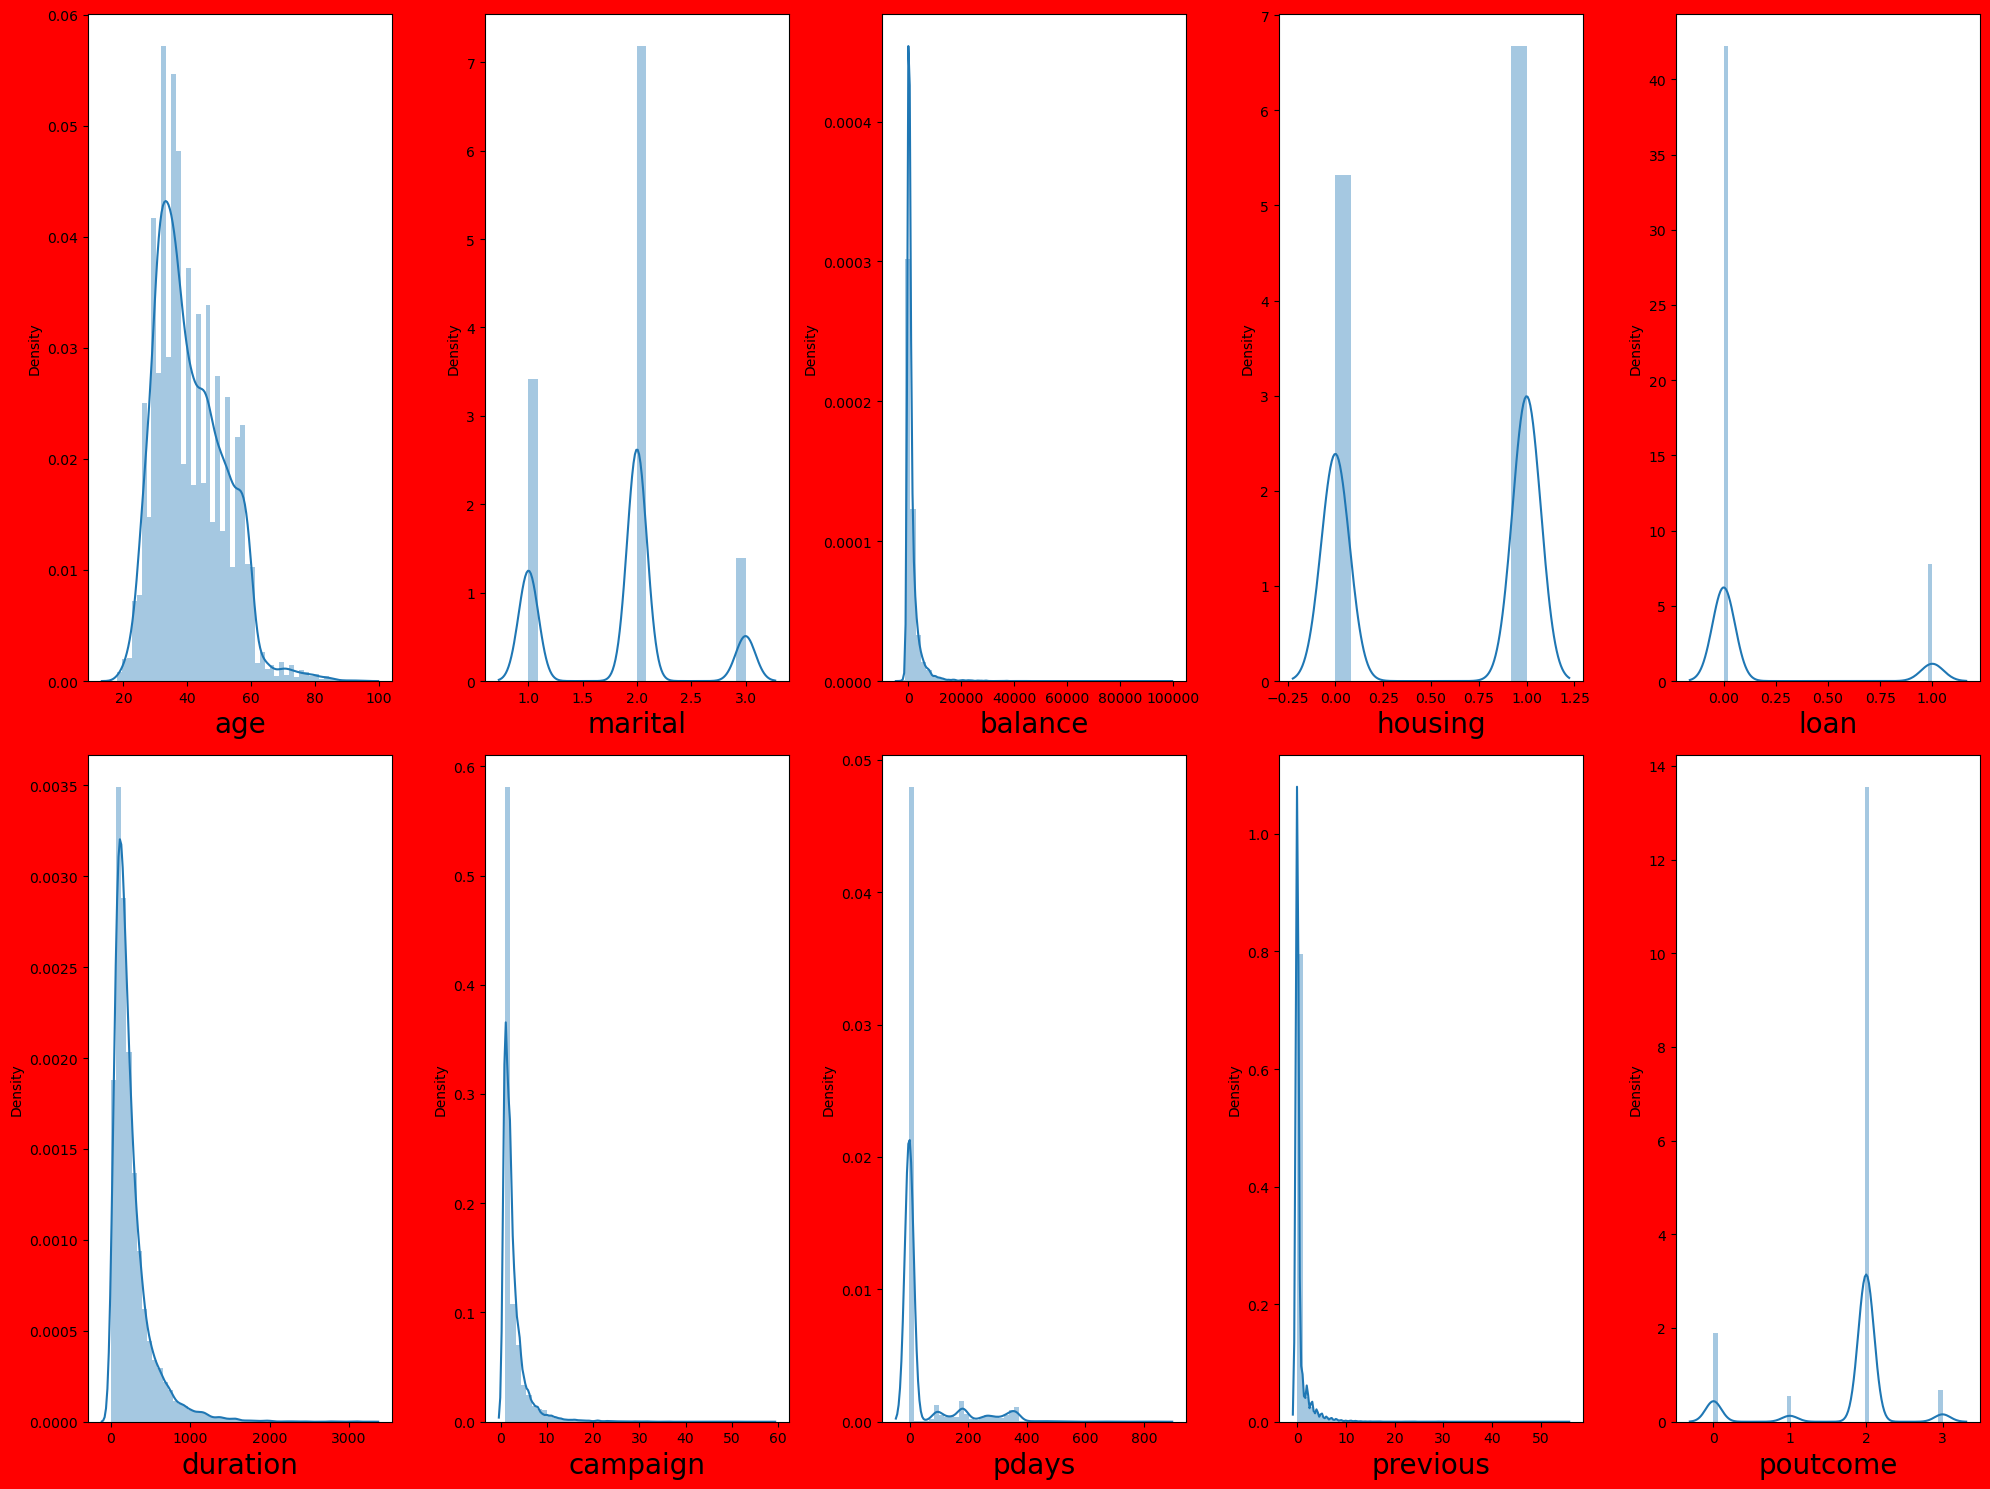

In [57]:
plt.figure(figsize=(20,15),facecolor='red')
plotnum=1
for column in live:
    if plotnum<=10:
        ax= plt.subplot(2,5,plotnum)
        sns.distplot(live[column])
        plt.xlabel(column, fontsize=20)
        
    plotnum+=1
    
plt.tight_layout()    

In [58]:
df_features=live.drop('poutcome', axis=1)

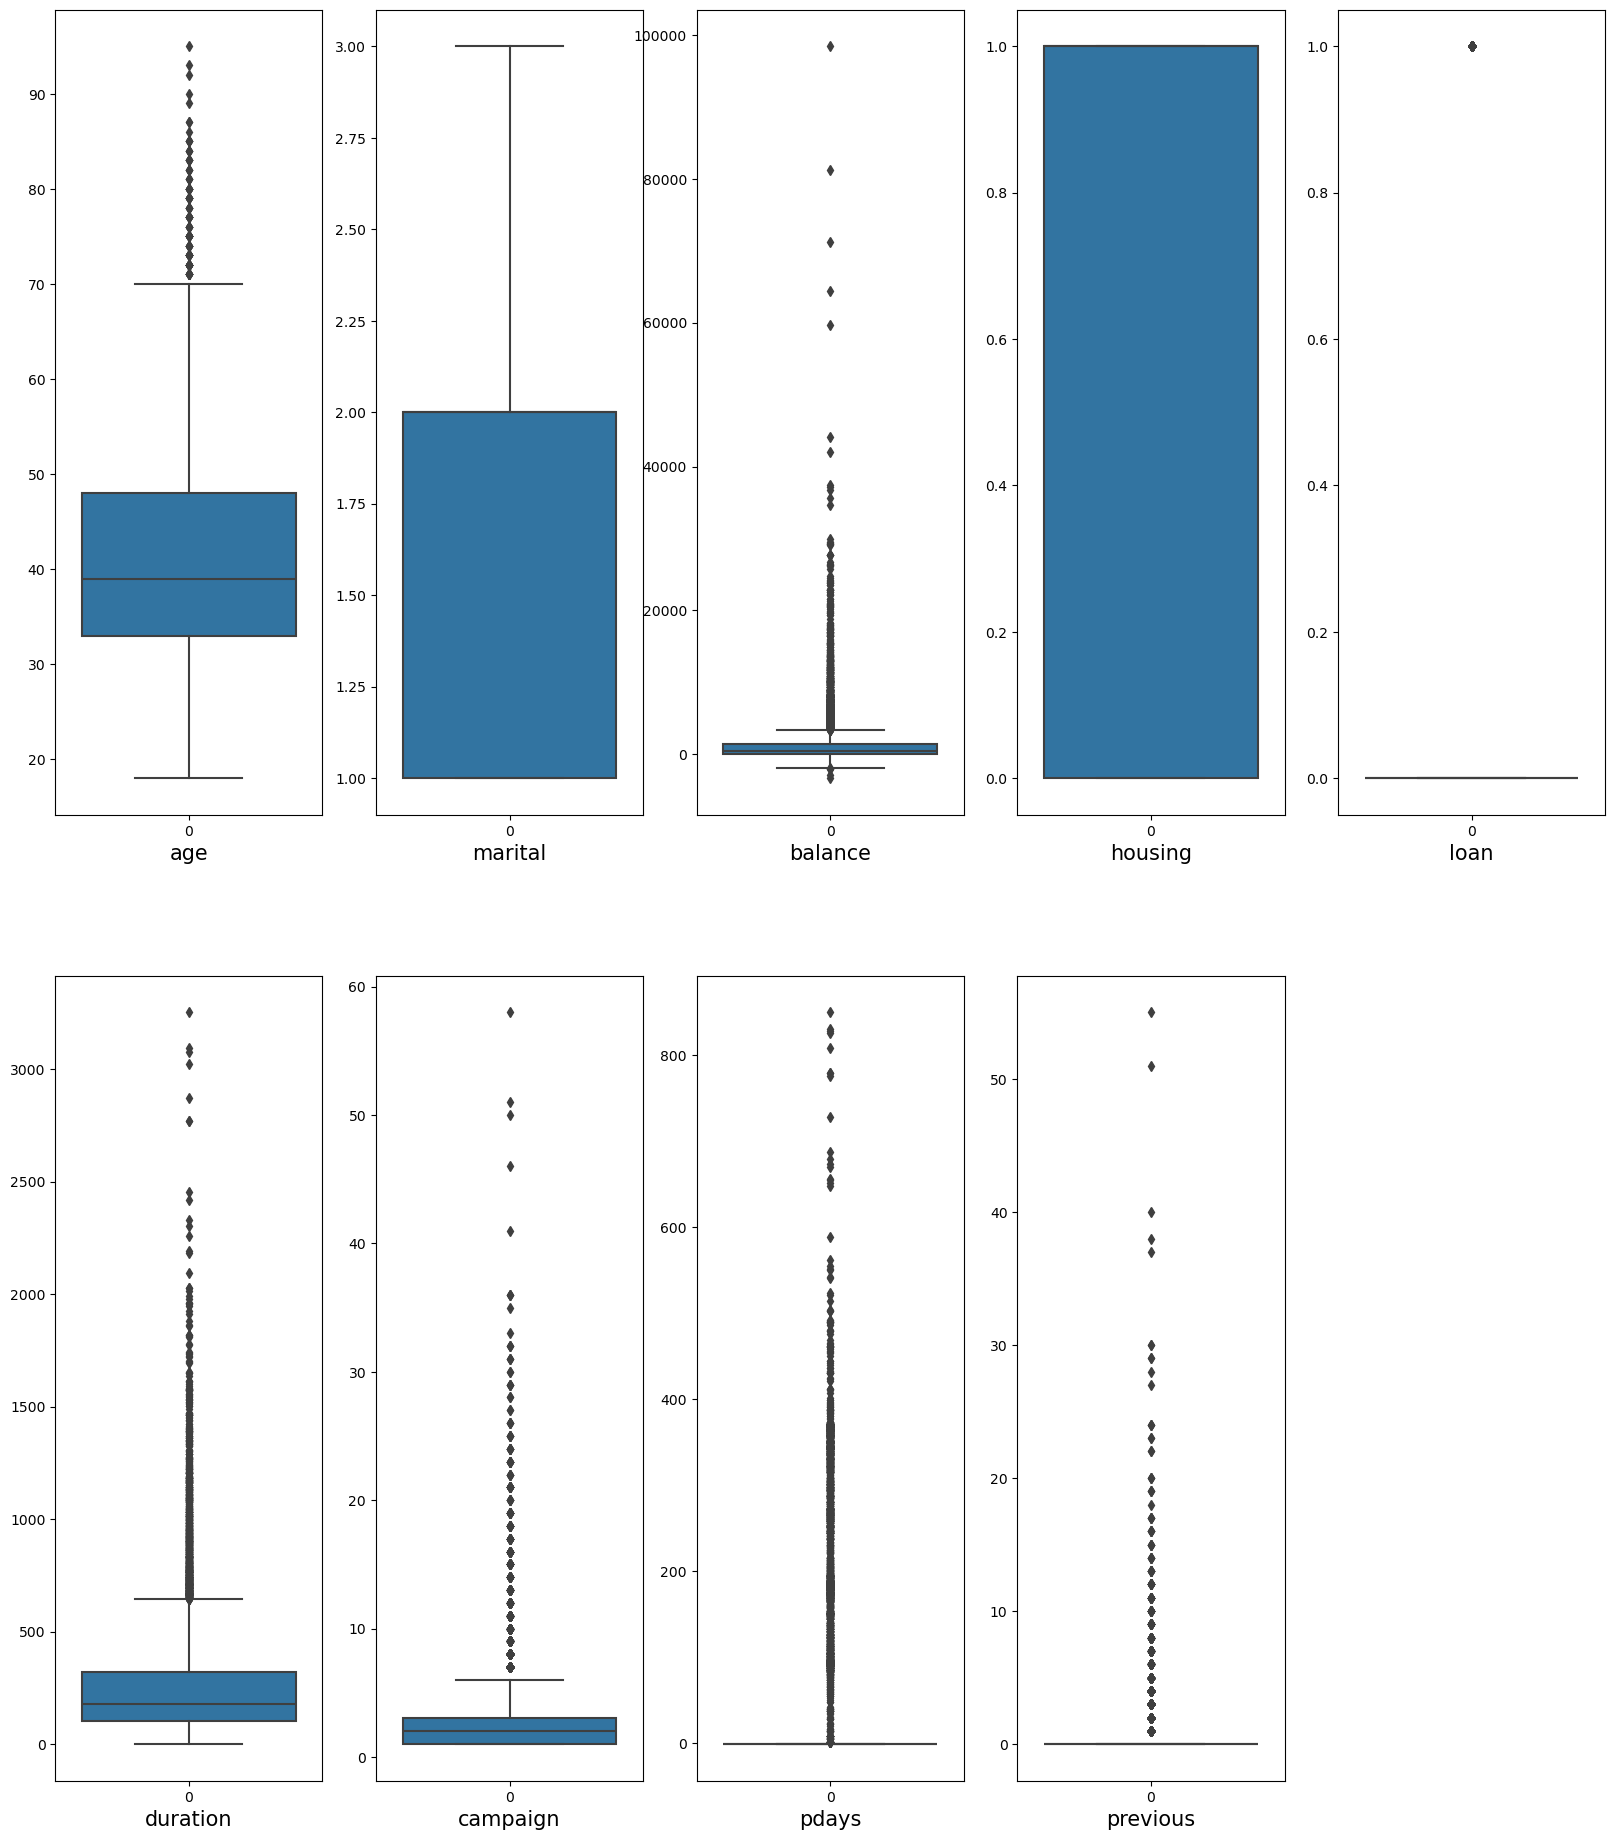

In [59]:
plt.figure(figsize=(20,23))
graph=1
for column in df_features:
    if graph<=10:
        plt.subplot(2,5,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()

In [60]:
q1=live.quantile(0.25)
q3=live.quantile(0.75)
iqr=q3-q1

In [61]:
q1

age          33.0
marital       1.0
balance      71.0
housing       0.0
loan          0.0
duration    102.0
campaign      1.0
pdays        -1.0
previous      0.0
poutcome      2.0
Name: 0.25, dtype: float64

In [62]:
age_high=(q3.age+(1.5*iqr.age))
print(age_high)
index=np.where(live['age']>age_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

70.5
(13426, 10)


,index,age,marital,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,0,32,2,118,1,0,20,6,-1,0,2
1,2,31,1,144,1,0,676,1,-1,0,2
2,3,57,1,3777,1,0,65,2,-1,0,2
3,4,45,3,-705,0,1,111,1,-1,0,2
4,5,32,1,0,1,0,455,2,-1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
13421,13559,39,2,45,0,0,148,4,-1,0,2
13422,13560,54,2,2281,1,0,158,1,-1,0,2
13423,13561,35,2,285,1,0,136,1,-1,0,2
13424,13562,29,1,464,0,0,208,2,91,3,1


In [63]:
bal_high=(q3.balance+(1.5*iqr.balance))
print(bal_high)
index=np.where(live['balance']>bal_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

3426.625
(12027, 10)


,index,age,marital,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,0,32,2,118,1,0,20,6,-1,0,2
1,2,31,1,144,1,0,676,1,-1,0,2
2,4,45,3,-705,0,1,111,1,-1,0,2
3,5,32,1,0,1,0,455,2,-1,0,2
4,6,33,1,307,1,0,309,2,-1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
12022,13559,39,2,45,0,0,148,4,-1,0,2
12023,13560,54,2,2281,1,0,158,1,-1,0,2
12024,13561,35,2,285,1,0,136,1,-1,0,2
12025,13562,29,1,464,0,0,208,2,91,3,1


In [64]:
dur_high=(q3.duration+(1.5*iqr.duration))
print(dur_high)
index=np.where(live['duration']>dur_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

644.5
(11181, 10)


,index,age,marital,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,0,32,2,118,1,0,20,6,-1,0,2
1,4,45,3,-705,0,1,111,1,-1,0,2
2,5,32,1,0,1,0,455,2,-1,0,2
3,6,33,1,307,1,0,309,2,-1,0,2
4,7,37,2,341,0,0,120,2,-1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
11176,13559,39,2,45,0,0,148,4,-1,0,2
11177,13560,54,2,2281,1,0,158,1,-1,0,2
11178,13561,35,2,285,1,0,136,1,-1,0,2
11179,13562,29,1,464,0,0,208,2,91,3,1


In [65]:
com_high=(q3.campaign+(1.5*iqr.campaign))
print(com_high)
index=np.where(live['campaign']>com_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

6.0
(10367, 10)


,index,age,marital,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,0,32,2,118,1,0,20,6,-1,0,2
1,4,45,3,-705,0,1,111,1,-1,0,2
2,5,32,1,0,1,0,455,2,-1,0,2
3,6,33,1,307,1,0,309,2,-1,0,2
4,7,37,2,341,0,0,120,2,-1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
10362,13559,39,2,45,0,0,148,4,-1,0,2
10363,13560,54,2,2281,1,0,158,1,-1,0,2
10364,13561,35,2,285,1,0,136,1,-1,0,2
10365,13562,29,1,464,0,0,208,2,91,3,1


In [66]:
pdays_high=(q3.pdays+(1.5*iqr.pdays))
print(pdays_high)
index=np.where(live['pdays']>pdays_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

-1.0
(8381, 10)


,index,age,marital,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,0,32,2,118,1,0,20,6,-1,0,2
1,4,45,3,-705,0,1,111,1,-1,0,2
2,5,32,1,0,1,0,455,2,-1,0,2
3,6,33,1,307,1,0,309,2,-1,0,2
4,7,37,2,341,0,0,120,2,-1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
8376,13557,30,1,-174,1,0,113,1,-1,0,2
8377,13558,32,1,129,1,0,213,1,-1,0,2
8378,13559,39,2,45,0,0,148,4,-1,0,2
8379,13560,54,2,2281,1,0,158,1,-1,0,2


In [67]:
previous_high=(q3.previous+(1.5*iqr.previous))
print(previous_high)
index=np.where(live['previous']>previous_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

0.0
(8381, 10)


,index,age,marital,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,0,32,2,118,1,0,20,6,-1,0,2
1,4,45,3,-705,0,1,111,1,-1,0,2
2,5,32,1,0,1,0,455,2,-1,0,2
3,6,33,1,307,1,0,309,2,-1,0,2
4,7,37,2,341,0,0,120,2,-1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
8376,13557,30,1,-174,1,0,113,1,-1,0,2
8377,13558,32,1,129,1,0,213,1,-1,0,2
8378,13559,39,2,45,0,0,148,4,-1,0,2
8379,13560,54,2,2281,1,0,158,1,-1,0,2


In [68]:
live.describe()

,age,marital,balance,housing,loan,duration,campaign,pdays,previous,poutcome
count,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.0,8381.0,8381.0
mean,40.309748,1.834507,601.549099,0.550292,0.172175,205.606730,2.189596,-1.0,0.0,2.0
std,9.937453,0.614800,828.807077,0.497494,0.377555,139.675351,1.338690,0.0,0.0,0.0
min,18.000000,1.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,-1.0,0.0,2.0
25%,32.000000,1.000000,32.000000,0.000000,0.000000,100.000000,1.000000,-1.0,0.0,2.0
50%,39.000000,2.000000,315.000000,1.000000,0.000000,170.000000,2.000000,-1.0,0.0,2.0
75%,48.000000,2.000000,916.000000,1.000000,0.000000,278.000000,3.000000,-1.0,0.0,2.0
max,70.000000,3.000000,3426.000000,1.000000,1.000000,644.000000,6.000000,-1.0,0.0,2.0


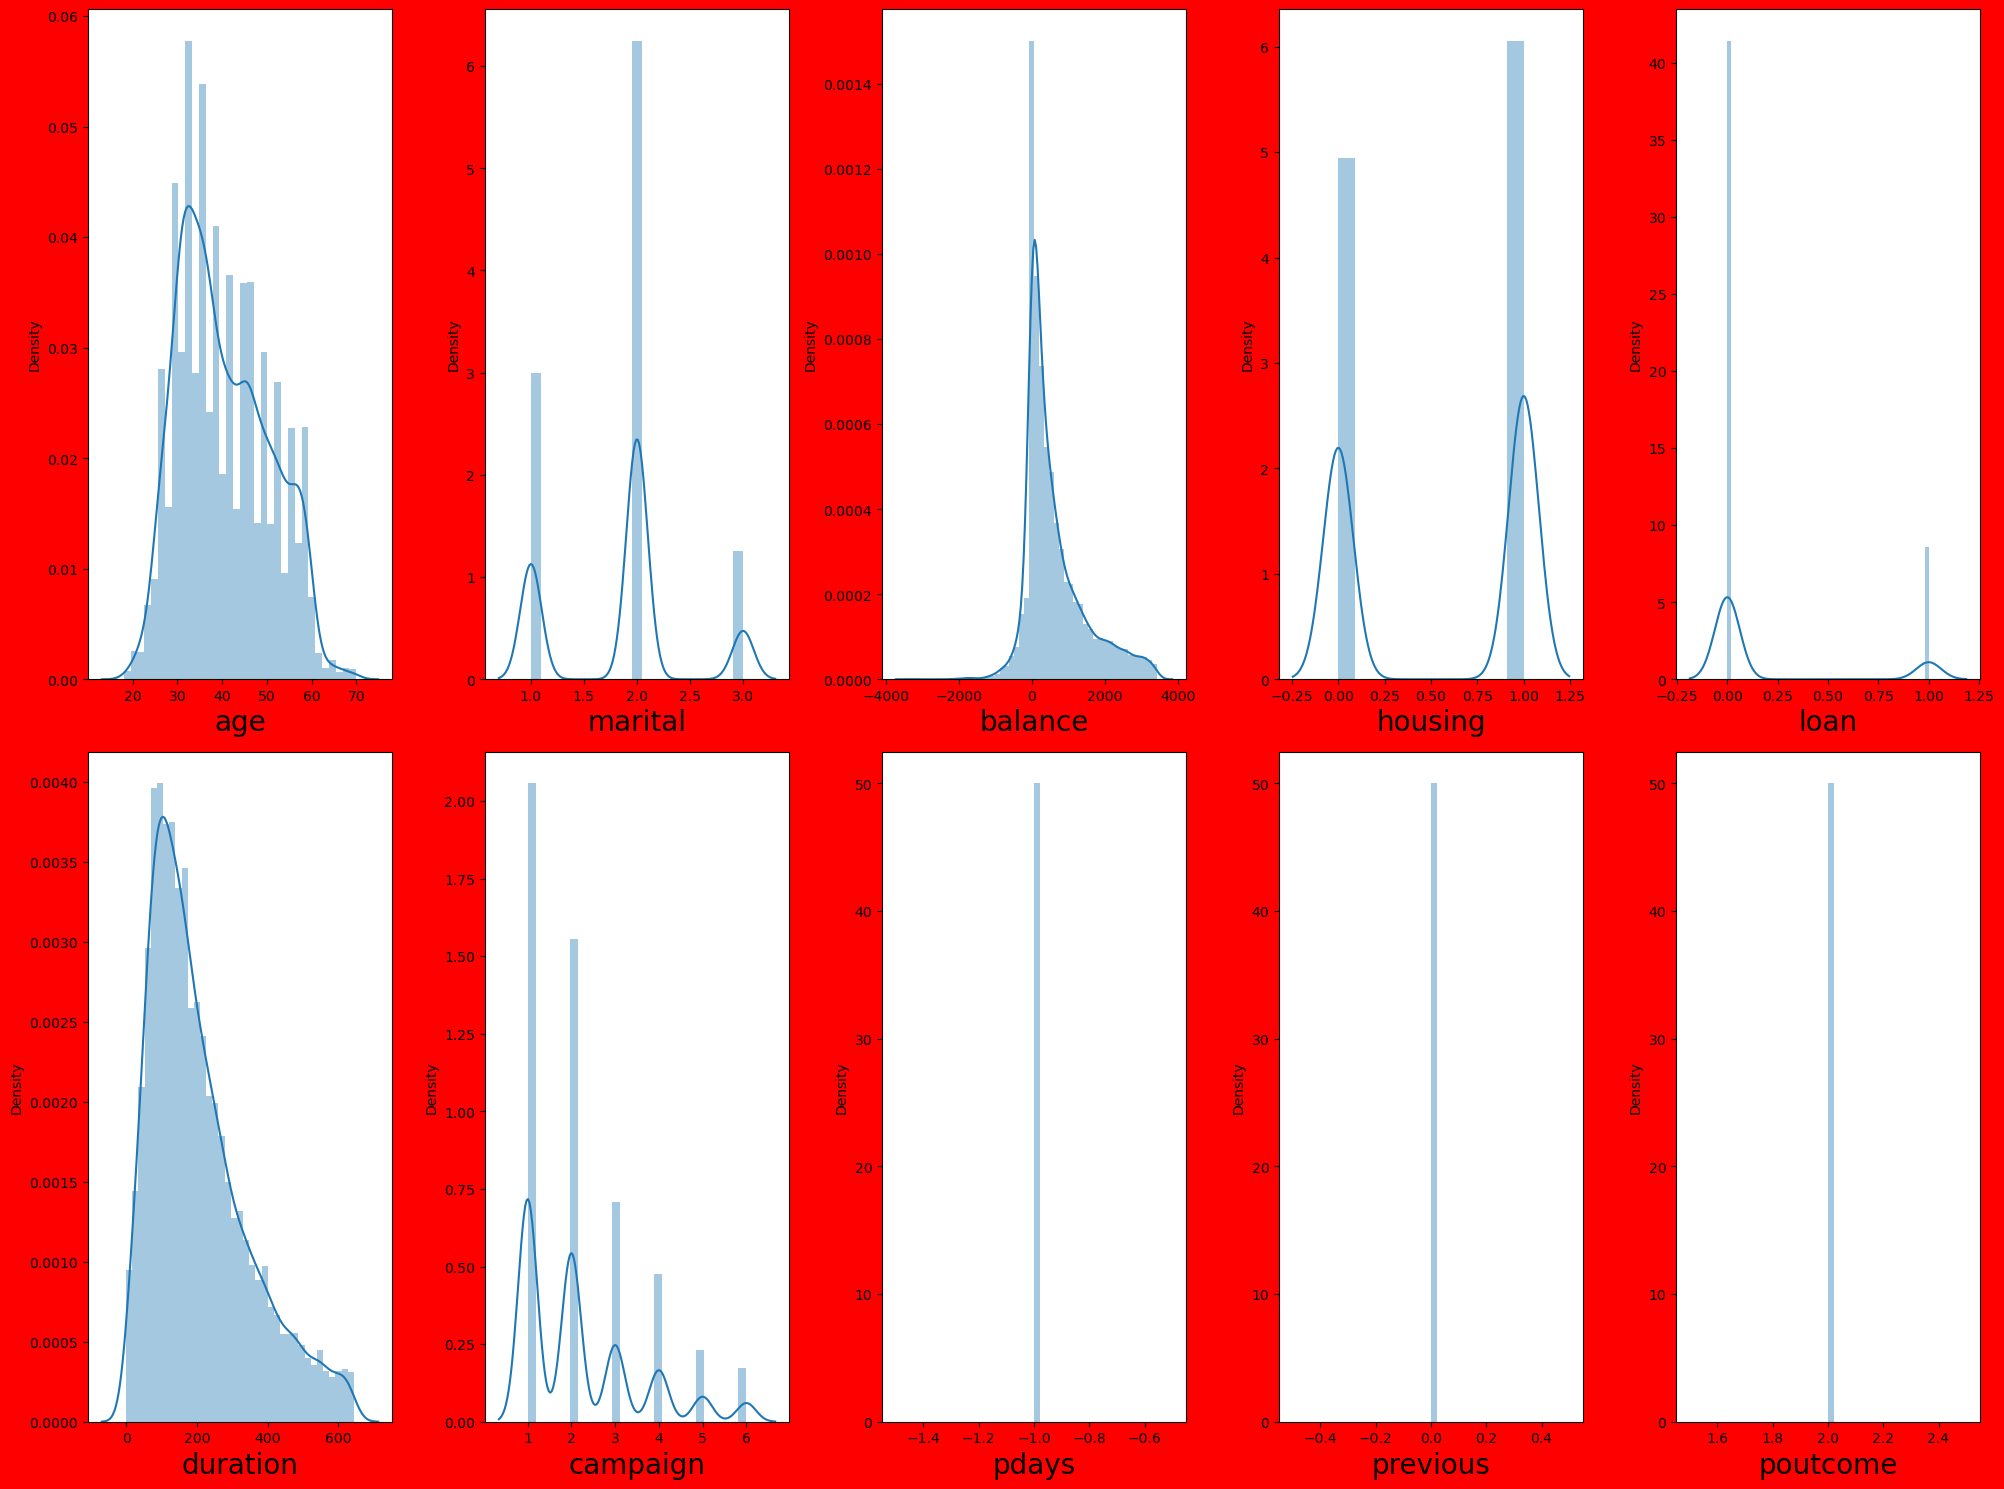

In [78]:
plt.figure(figsize=(20,15),facecolor='red')
plotnum=1
for column in live:
    if plotnum<=10:
        ax= plt.subplot(2,5,plotnum)
        sns.distplot(live[column])
        plt.xlabel(column, fontsize=20)
        
    plotnum+=1
    
plt.tight_layout()

In [70]:
X = live.drop('poutcome', axis=1)
y = live['poutcome']

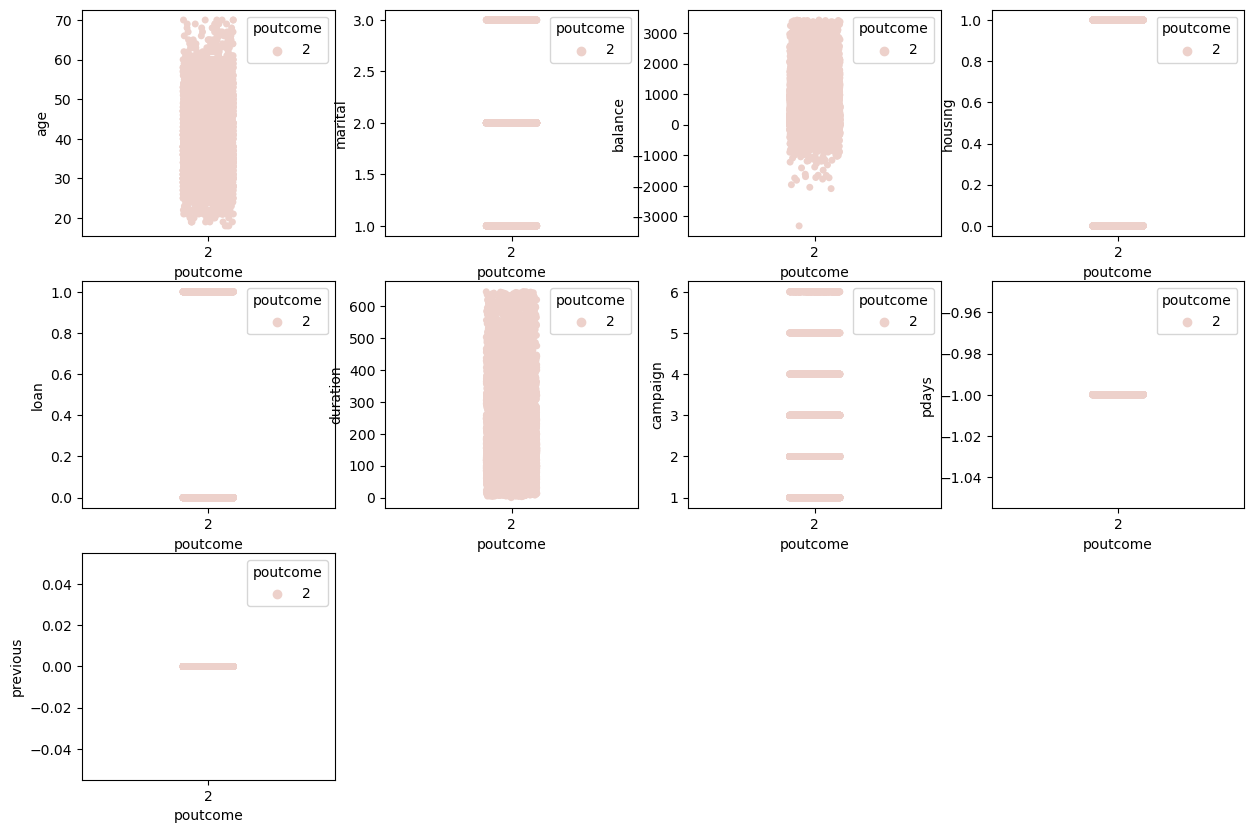

In [80]:
plt.figure(figsize=(15,10))
plotnumber = 1
for column in X:
    if plotnumber <=10:
        ax = plt.subplot(3,4, plotnumber)
        sns.stripplot(x=y, y=X[column],hue=y)
    plotnumber+=1
plt.show()

In [72]:
df_live= live.drop('poutcome', axis=1)

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [74]:
X_scaler

array([[-0.83625493,  0.26919868, -0.58346262, ...,  2.84653688,
         0.        ,  0.        ],
       [ 0.47200542,  1.89584189, -1.57651532, ..., -0.88867928,
         0.        ,  0.        ],
       [-0.83625493, -1.35744453, -0.72584442, ..., -0.14163605,
         0.        ,  0.        ],
       ...,
       [-0.13180705,  0.26919868, -0.67154627, ...,  1.35245042,
         0.        ,  0.        ],
       [ 1.37772412,  0.26919868,  2.0264681 , ..., -0.88867928,
         0.        ,  0.        ],
       [-0.5343487 ,  0.26919868, -0.38195618, ..., -0.88867928,
         0.        ,  0.        ]])

In [75]:
x_train, x_test,y_train, y_test= train_test_split(X_scaler,y,test_size=0.25, random_state=355)
y_train.head()


6943     2
5892     2
12541    2
1999     2
5447     2
Name: poutcome, dtype: int64

In [90]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=428)

In [92]:
# Train the model
# Create the model
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 2

In [98]:
## check model fitting

regression.score(x_train, y_train)

NameError: name 'regression' is not defined